In [66]:
# Basic statistics in this notebook, things covered are:-
#frequency distribution of words in individual podcasts
#frequency distribution of words in all the podcasts together.
#finding the mean of the frequency of words in individual podcasts and plotting it.
#looking at the probability density function of frequency distribution and trying to see if it follows the zip's law
#fitting poisson's distribution to the data and making inference from it
#hypothesis testing in progress on distribution

In [67]:
#import modules
import glob
import os
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ps = PorterStemmer()
results = []
saveLocation = 'C:\\Users\\Harini\\Documents\\GitHub\\Podknow\\data\\transcripts\\scrubbed'
for folderName,subfolders,fileName in os.walk('C:\\Users\\Harini\\Documents\\GitHub\\Podknow\\data\\transcripts\\scrubbed'):
    for file in fileName:
        if  str(file.endswith(".txt_scrubbed")):
            f = open(os.path.join(folderName,file),'rb')
            data = pickle.load(f)
            #removing alpha numeric and other unnecessary words using stop_words
            data = [word for word in data if word.isalpha()]
            stop_words = ['I','me','said','know','like','fucking','\'s','\'re','\'m', 'n\'t','think','feel','got','get','say','people','see','going']
            data = [w for w in data if not w in stop_words]
            value0, value1, value2,value3,*extraWords = file.split('_')
            value4 = data
            rows = (value0,value1,value2,value3,value4)
            results.append(rows)
            
            
labels = ['ID','Name','Date','topicName','scrubbedtext']
PodKnow_Data = pd.DataFrame.from_records(results, columns= labels)

            

In [68]:
text =[]
for i in range (0,len(PodKnow_Data)):
    text = text + (PodKnow_Data['scrubbedtext'][i])
len(text)    

592450

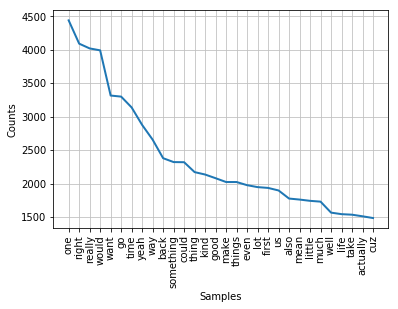

In [108]:
#frequnecy distributions of words on y axis vs the words on x axis
from nltk import FreqDist
fdist2 = FreqDist(text)
fdist2.plot(30, cumulative=False)

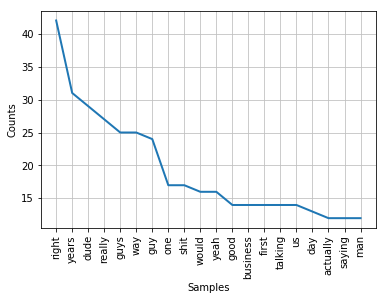

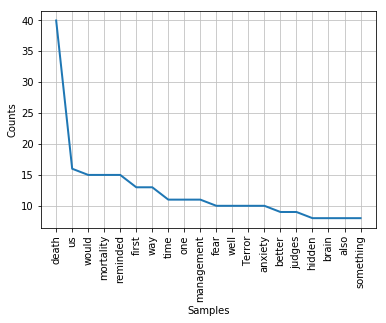

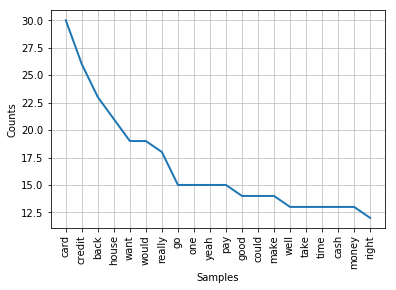

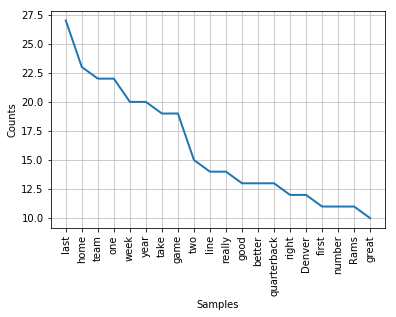

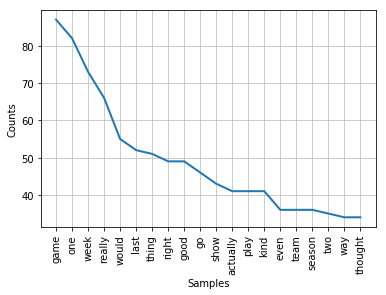

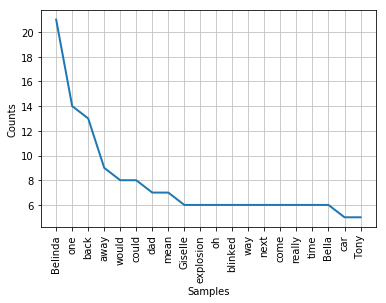

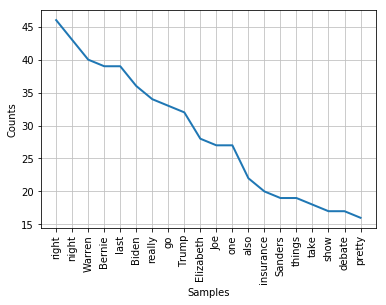

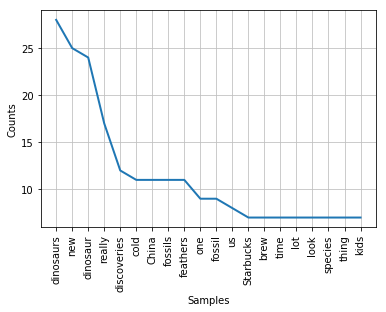

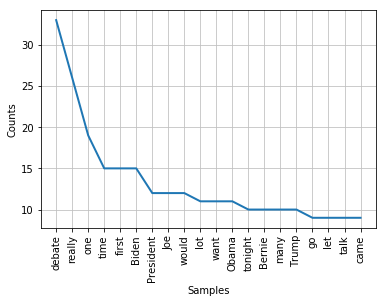

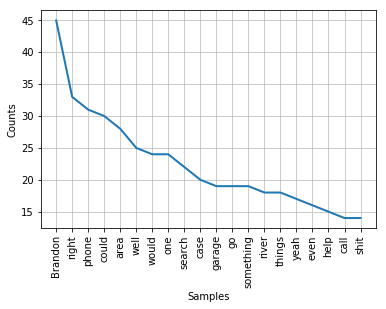

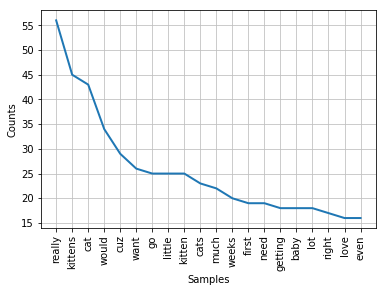

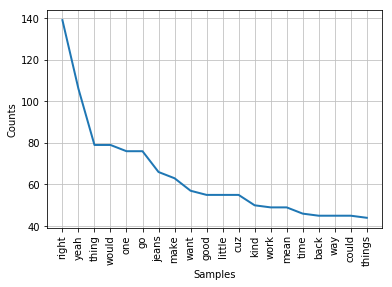

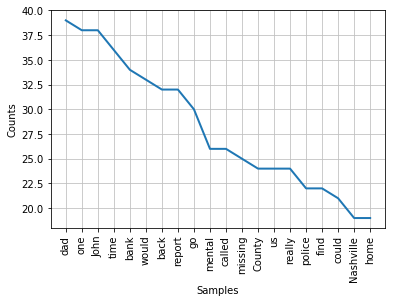

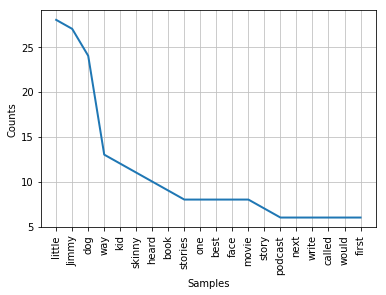

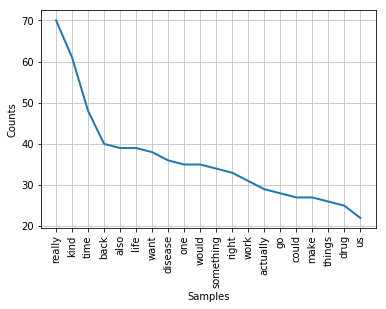

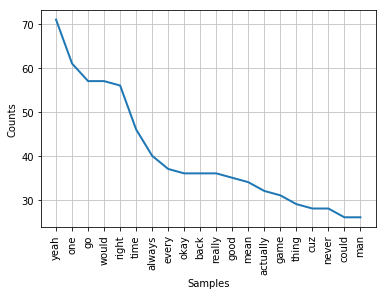

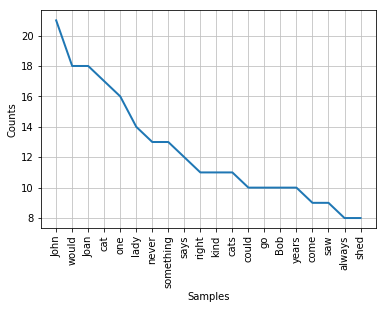

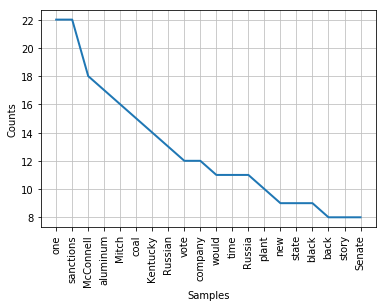

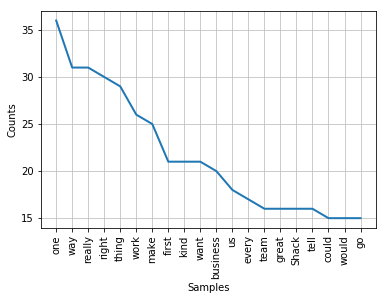

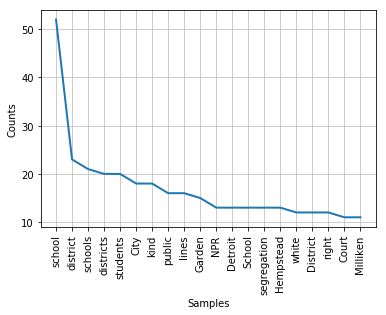

In [155]:
#plotting freqnecy distributions of all the 200 podcasts.
for i in range (0,20):
    plot_indviduals = PodKnow_Data['scrubbedtext'][i]
    fdist1 = FreqDist(plot_indviduals)
    fdist1.plot(20, cumulative=False)

In [71]:
import nltk
import nltk.tokenize 
import collections
import numpy as np
from collections import Counter
#counts = list(Counter(PodKnow_Data['scrubbedtext'][0]))
counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][2]).most_common(1000))
#print(counts)

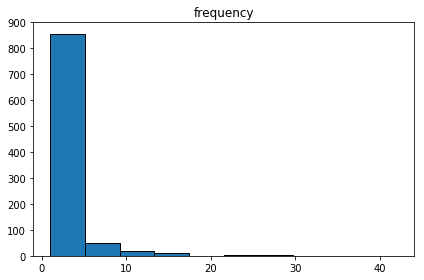

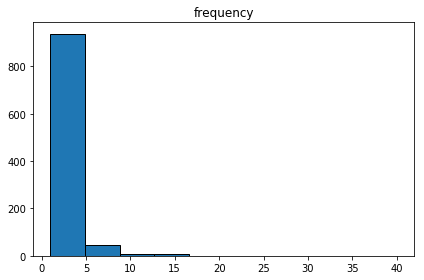

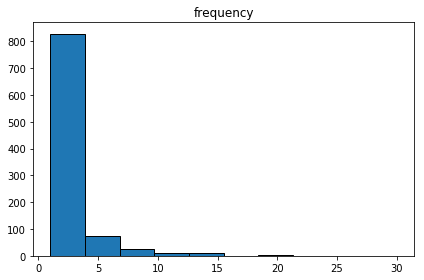

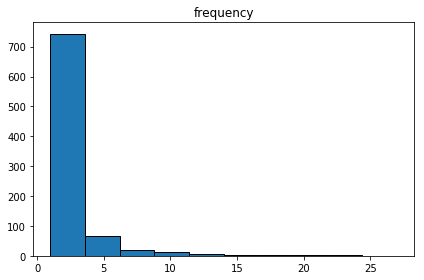

In [130]:
#frequency in the form of histograms for word and frequency
for i in range (0,4):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    #df.plot(kind='bar', x='word')
    #df.plot(kind="density",figsize=(10,10),xlim=(0,100))
    _ = df.hist(sharex=True, sharey=True, grid=False, ec='black')
    plt.tight_layout()

In [154]:
for i in range (2,3):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    print(df.tail(900))

            word  frequency
57      honestly          6
58       looking          6
59        Newark          6
60          year          6
61          guys          6
62      purchase          6
63        months          6
64      interest          6
65          debt          6
66          York          6
67     sometimes          5
68           day          5
69        family          5
70      feedback          5
71       Tiffany          5
72          next          5
73          knew          5
74          went          5
75         brand          5
76           hit          5
77         great          5
78        little          5
79      anything          5
80       podcast          5
81          read          5
82          Citi          5
83     basically          5
84      property          5
85      birthday          4
86       realize          4
..           ...        ...
927         Tech          1
928       single          1
929     scenario          1
930      tonight    

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


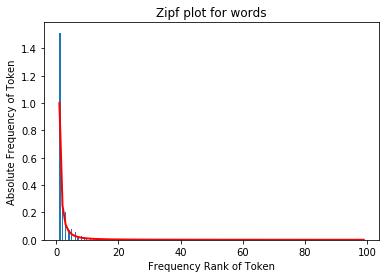

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


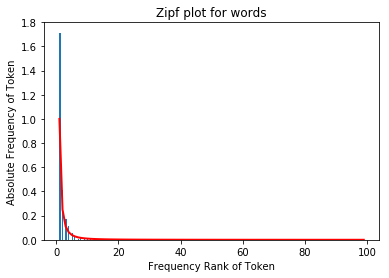

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


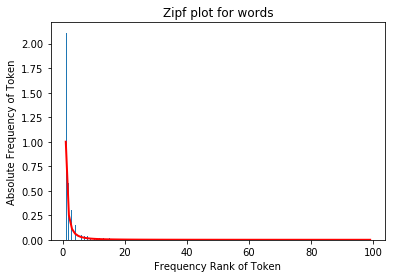

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


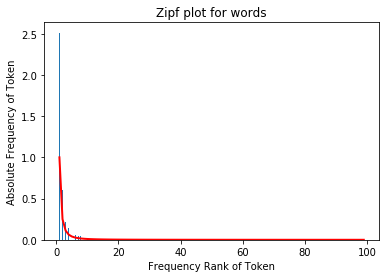

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


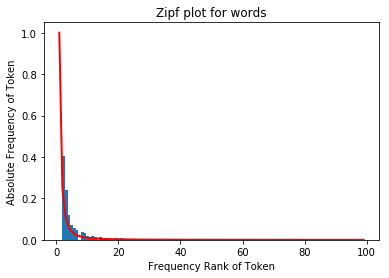

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


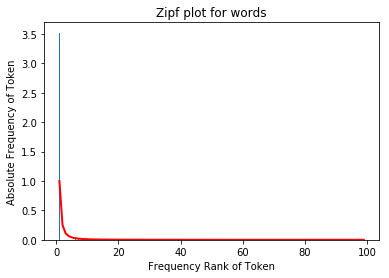

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


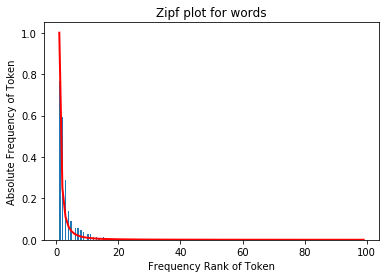

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


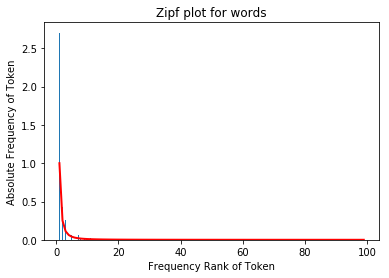

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


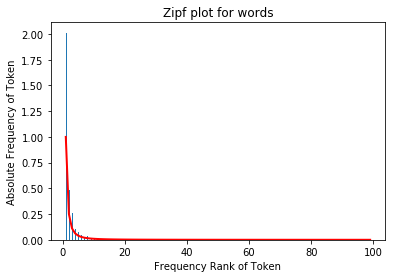

C:\Users\Harini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


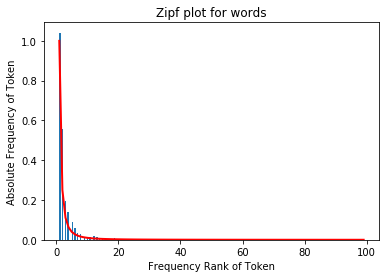

In [78]:
#trying to fit the zip's law to the  word frequencies histograms generated 
#taken first 10 podcasts
for i in range (0,10):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    s = np.array(df['frequency'])
    a = 2
    count, bins, ignored = plt.hist(s,100, normed=True)
    plt.title("Zipf plot for words")
    x = np.arange(1., 100.)
    plt.xlabel("Frequency Rank of Token")
    y = x**(-a) / sps.zetac(a)
    plt.ylabel("Absolute Frequency of Token")
    plt.plot(x, y/max(y), linewidth=2, color='r')
    plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

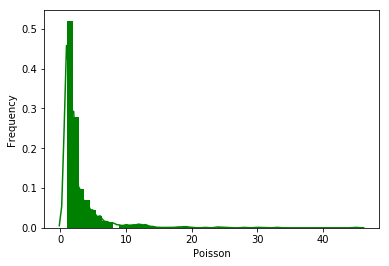

In [79]:
#trying to fit poison distribution into random word frequency
from scipy.stats import poisson
import seaborn as sb
ax = sb.distplot(s,kde=True,color='green',hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')


2.3692636072572038 3.3529857020787794
1.852 2.1559443406544614
2.220480668756531 2.8140709621903306
2.1443538998835856 2.7828052019680833
6.011 8.15860766307585
1.5610256410256411 1.3328661903558885
3.517 4.716111851939052
1.768716577540107 2.212926283872449
2.016891891891892 2.398560618864299
2.871 3.794253417999383


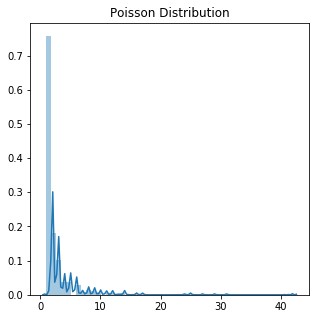

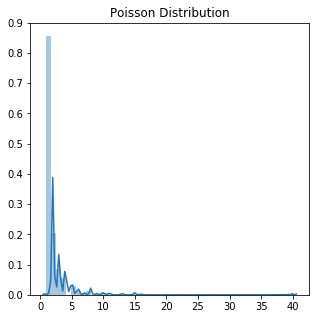

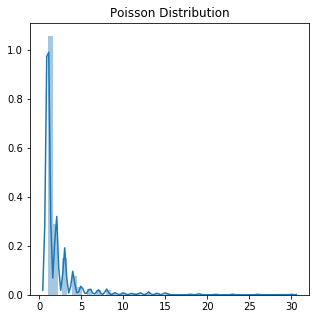

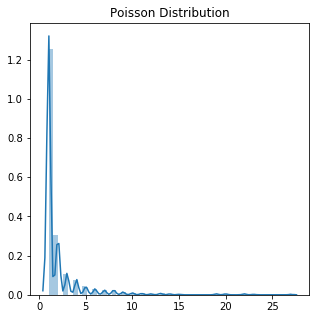

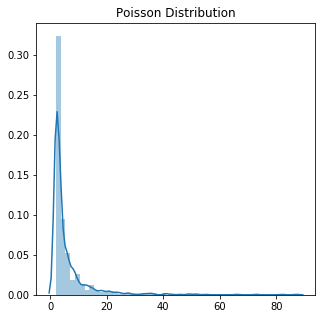

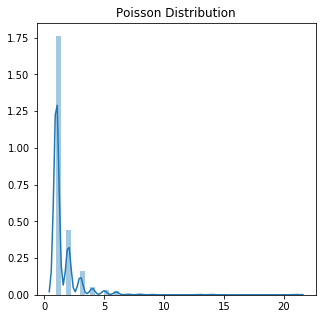

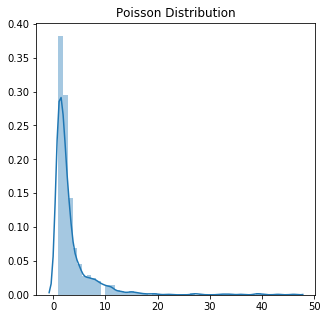

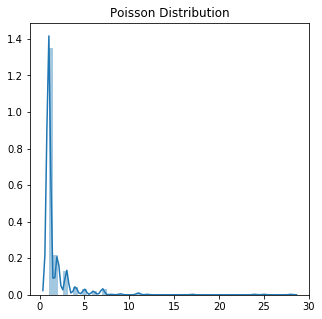

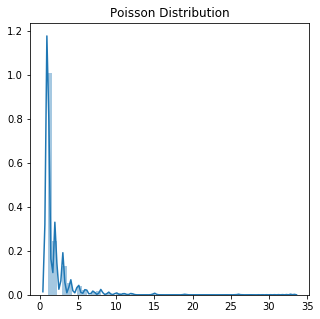

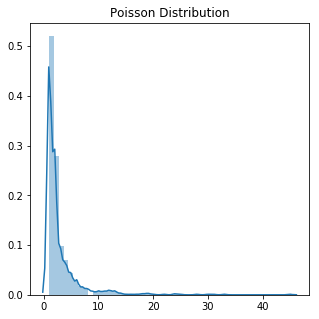

In [106]:
#trying to fit the word frequency 
for i in range (0,10):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    s = np.array(df['frequency'])
    #s_poisson = s
    plt.subplots(figsize=(5,5))
    plot=sb.distplot(pd.DataFrame(s)).set_title('Poisson Distribution')
    fig=plot.get_figure()
    # print(kstest(s,'poisson', args=(1,), alternative = 'greater',N=1000))
    print(np.mean(s),np.std(s))

In [103]:
records=[]
for i in range (0,10):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    records.append(df['frequency'].describe())

In [83]:
import numpy as np
import pandas as pd
from scipy.stats import( kstest, poisson)


In [156]:
for i in range (0,10):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    s = np.array(df['frequency'])
    mu=1
    #poissonDis = poisson.rvs(mu,size=10000)
print(kstest(s,'poisson', args=(1,), alternative = 'greater',N=1000))

KstestResult(statistic=0.0, pvalue=1.0)


In [23]:
records

[count    937.000000
 mean       2.369264
 std        3.354776
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max       42.000000
 Name: frequency, dtype: float64, count    1000.000000
 mean        1.852000
 std         2.157023
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max        40.000000
 Name: frequency, dtype: float64, count    957.000000
 mean       2.220481
 std        2.815542
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max       30.000000
 Name: frequency, dtype: float64, count    859.000000
 mean       2.144354
 std        2.784426
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max       27.000000
 Name: frequency, dtype: float64, count    1000.00000
 mean        6.01100
 std         8.16269
 min         2.00000
 25%         2.00000
 50%         3.00000
 75%         6.00000
 max        87.00000
 Name: frequency, dt

In [14]:
#Zipf's law holds if the number of elements with a given frequency is a random variable with power law distribution. 
#It has been claimed that this representation of Zipf's law is more suitable for statistical testing, and in this way it
#has been analyzed in more than 30,000 English texts.



In [15]:
s = np.array(df['frequency'])


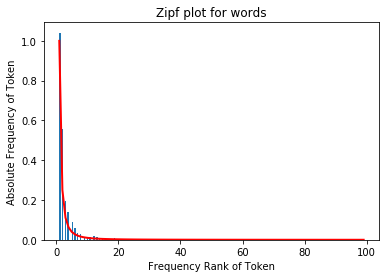

In [17]:
#Convert counts of values to numpy array
s = np.array(df['frequency'])

#define zipf distribution parameter. Has to be >1
a = 2 

# Display the histogram of the samples,
#along with the probability density function
count, bins, ignored = plt.hist(s,100, normed=True)
plt.title("Zipf plot for words")
x = np.arange(1., 100.)
plt.xlabel("Frequency Rank of Token")
y = x**(-a) / sps.zetac(a)
plt.ylabel("Absolute Frequency of Token")
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()

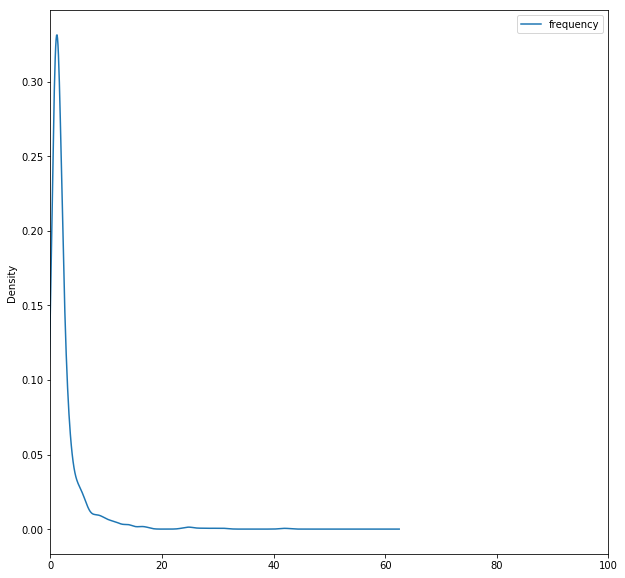

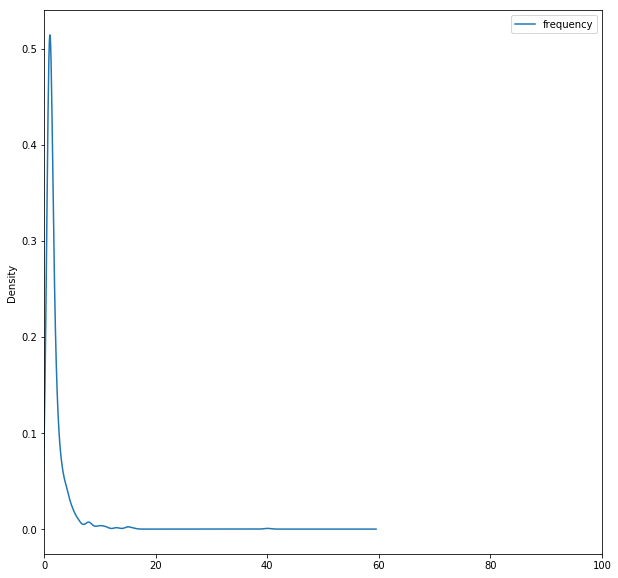

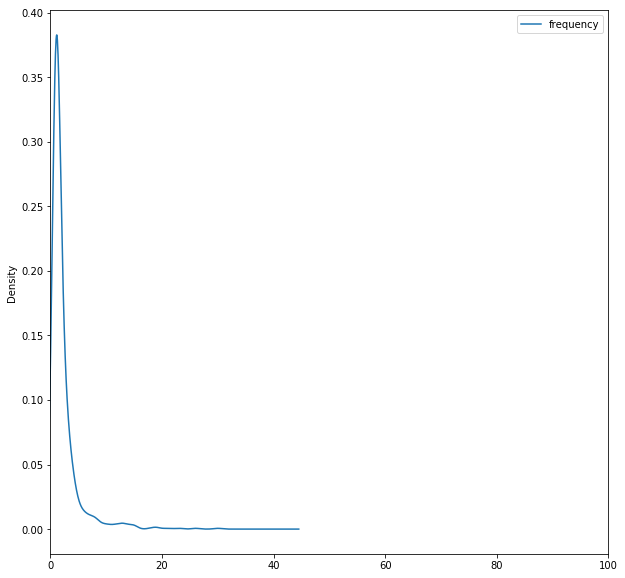

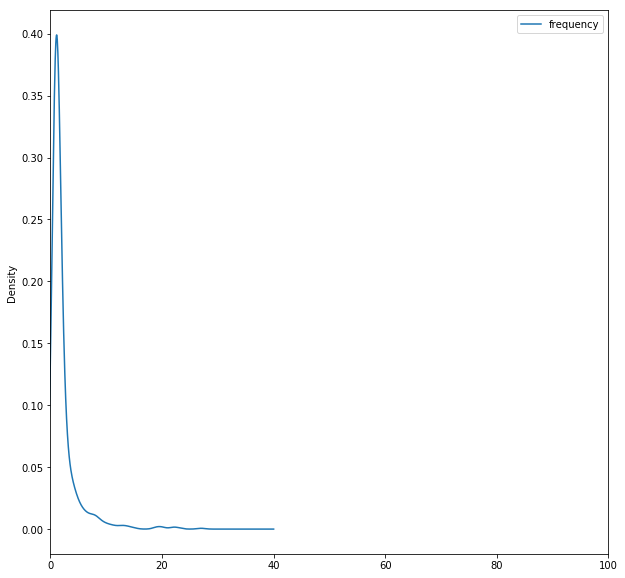

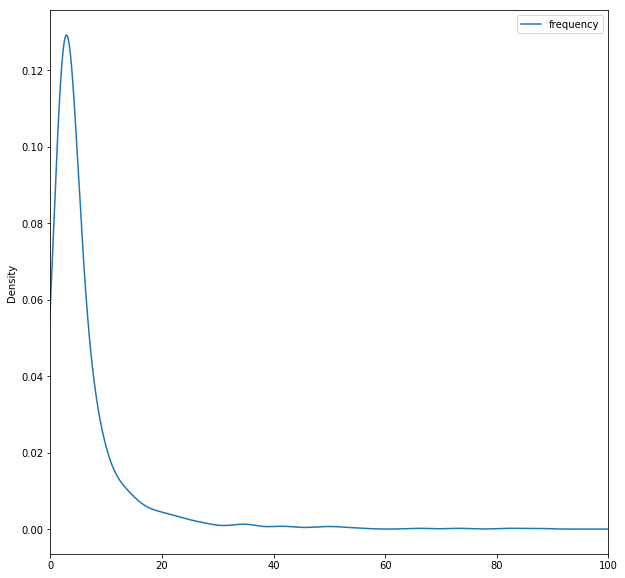

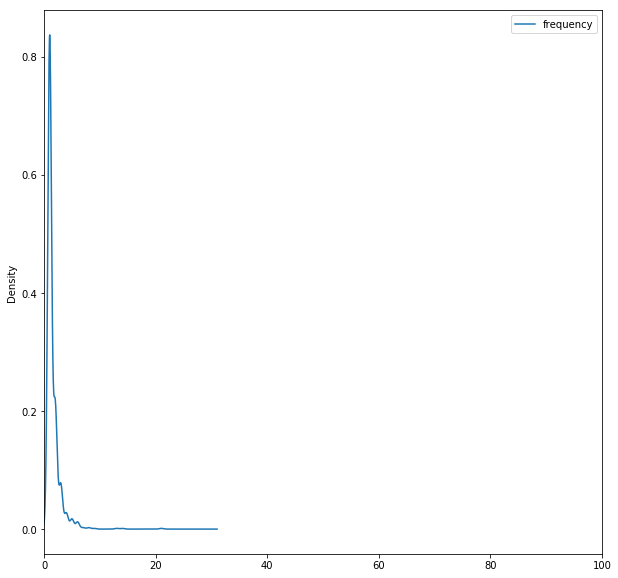

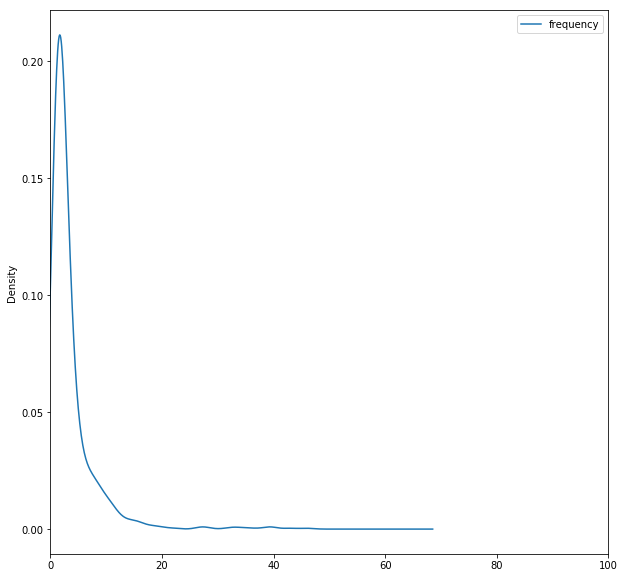

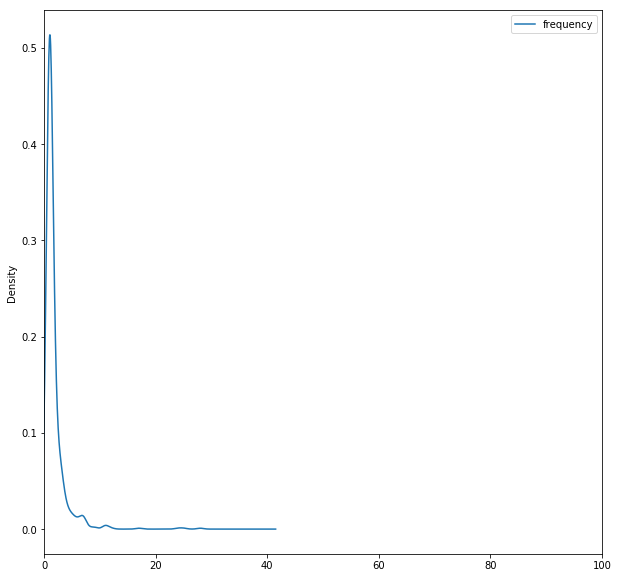

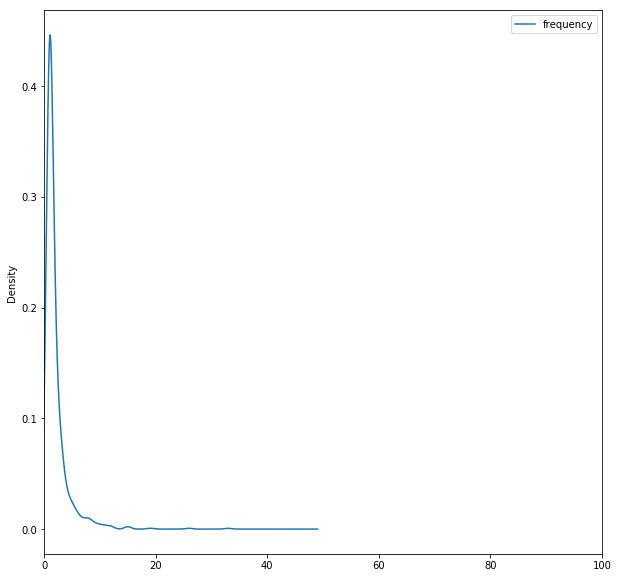

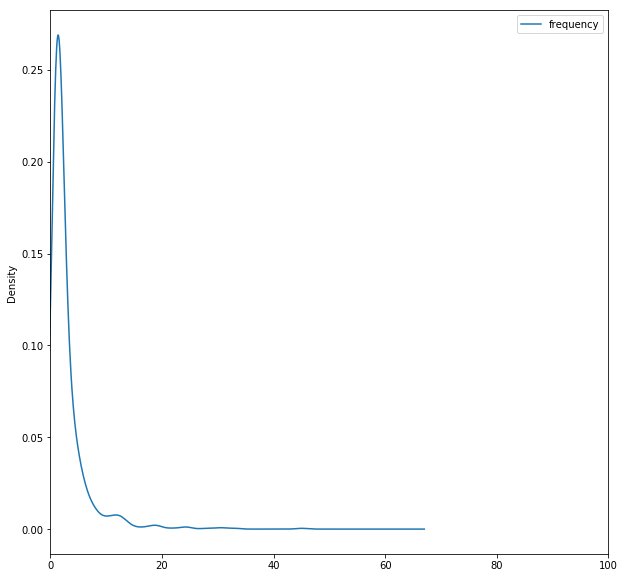

In [84]:
#probability density function 
for i in range (0,10):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    df.plot(kind="density",figsize=(10,10),xlim=(0,100))

In [85]:
#positive skew value shows that frequenecy distribution is skewed.
#the data has a  positive skew
df['frequency'].skew()

4.675938526656561

In [86]:
#kurt is measure of peak
df['frequency'].kurt()

31.22202857425833

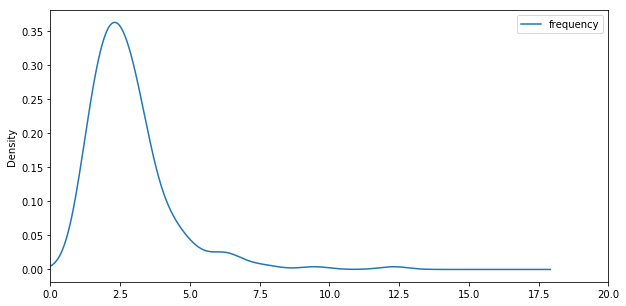

In [113]:
#plot of mean frequency of words from each podcasts and plotting it as probability density function.
results1=[]
for i in range (0,len((PodKnow_Data['scrubbedtext']))):
    counts= list(collections.Counter(PodKnow_Data['scrubbedtext'][i]).most_common(1000))
    df = pd.DataFrame(counts, columns=['word', 'frequency'])
    s = df['frequency'].mean()
    results1.append(s)
df_mean= pd.DataFrame(results1, columns=['frequency'])   
df_mean.plot(kind="density",figsize=(10,5),xlim=(0,20))

In [112]:
df_mean.describe()

,frequency
count,194.000000
mean,2.826707
std,1.478671
min,1.076923
25%,1.901628
50%,2.518000
75%,3.237250
max,12.304000
